<a href="https://colab.research.google.com/github/scrum2sameshark2/scrum/blob/main/Scrum_Ordered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Driveと接続するためのおまじない


---



# GooleDriveと接続する

In [78]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CSVファイルのデータおよびグラフ表示

In [ ]:
import pandas as pd

# CSV ファイルを読み込む
df = pd.read_csv("/content/Scrum Ordered - Order.csv", nrows=1)  # 最初の1行を読み込む

# 1行目のデータを表示
print(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ファイルを読み込む
df = pd.read_csv("/content/Scrum Ordered - Order.csv", parse_dates=[1], header=0)

# 日付データ（2列目）を日付型に変換
df['Date'] = pd.to_datetime(df.iloc[:, 1])

# 年ごとの4月前半のデータを抽出し、金額を合計する
april_data = df[(df['Date'].dt.month == 7) ]
yearly_april_data = april_data.groupby(df['Date'].dt.year)['明細金額'].sum()  # 'Total'列が金額の列だと仮定

# 金額をMillion (JPY) 単位に変換
yearly_april_data_million = yearly_april_data / 1e6

# 縦棒グラフを描画
plt.figure(figsize=(10, 6))
yearly_april_data_million.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Amount Order (Million JPY)')
plt.title('Total Amount for Each Month by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



# Google スプレッドシートとの接続

In [99]:
import gspread
from google.auth import default
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt

# Google 認証
creds, _ = default()
gc = gspread.authorize(creds)

# スプレッドシートを開く
url = "https://docs.google.com/spreadsheets/d/1H2UwZ5_ufWsAxoHYvjcQMqq0dU25y6JF5c3vIxyBefE/edit#gid=1442642716"
ss = gc.open_by_url(url)

# ワークシートを選択
ws = ss.worksheet("Order")

# データを取得
data = ws.get_all_values()

# データをデータフレームに変換
df = pd.DataFrame(data[1:], columns=data[0])

# 最後の5行の1〜3列を表示
print(df.iloc[-5:, :3])

             受注番号        受注日    得意先コード
16036  0044J00171  2024/4/18  71012-18
16037  0144J00083  2024/4/23  78014-05
16038  0044J00170  2024/4/23  78009-02
16039  0144J00084  2024/4/23  75007-11
16040  0044J00171  2024/4/23  71012-18


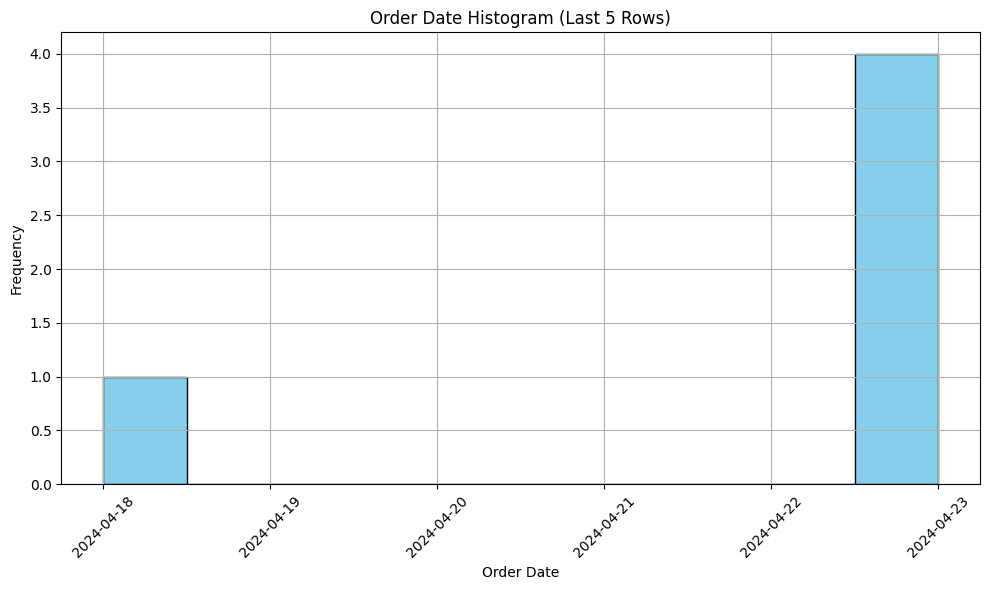

In [102]:
# 最後の5行を取得
last_5_rows = df.iloc[-5:, :]

# 受注日のデータを取得し、日付型に変換
order_dates = pd.to_datetime(last_5_rows['受注日'])

# ヒストグラムを作成
plt.figure(figsize=(10, 6))
order_dates.hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Order Date Histogram (Last 5 Rows)')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# グラフを表示
plt.show()